<a href="https://colab.research.google.com/github/KenDaupsey/Exploratory-Data-Analysis-EDA-/blob/main/Exploratory_Data_Analysis_(EDA)_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#### EXPLORATORY DATA ANALYSIS EXAMPLE 4

# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [31]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Exploratory-Data-Analysis-EDA-/main/hsb2%7Edata.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst  
0     57  
1     61  
2     31  
3     56  
4     61  


In [32]:
# Display the basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB
None


In [33]:
# Summary statistics of the numerical columns
print(df.describe())

               id        read       write        math     science       socst
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000   52.230000   52.775000   52.645000   51.850000   52.405000
std     57.879185   10.252937    9.478586    9.368448    9.900891   10.735793
min      1.000000   28.000000   31.000000   33.000000   26.000000   26.000000
25%     50.750000   44.000000   45.750000   45.000000   44.000000   46.000000
50%    100.500000   50.000000   54.000000   52.000000   53.000000   52.000000
75%    150.250000   60.000000   60.000000   59.000000   58.000000   61.000000
max    200.000000   76.000000   67.000000   75.000000   74.000000   71.000000


In [34]:
# Check for missing values
print(df.isnull().sum())

id         0
female     0
race       0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
dtype: int64


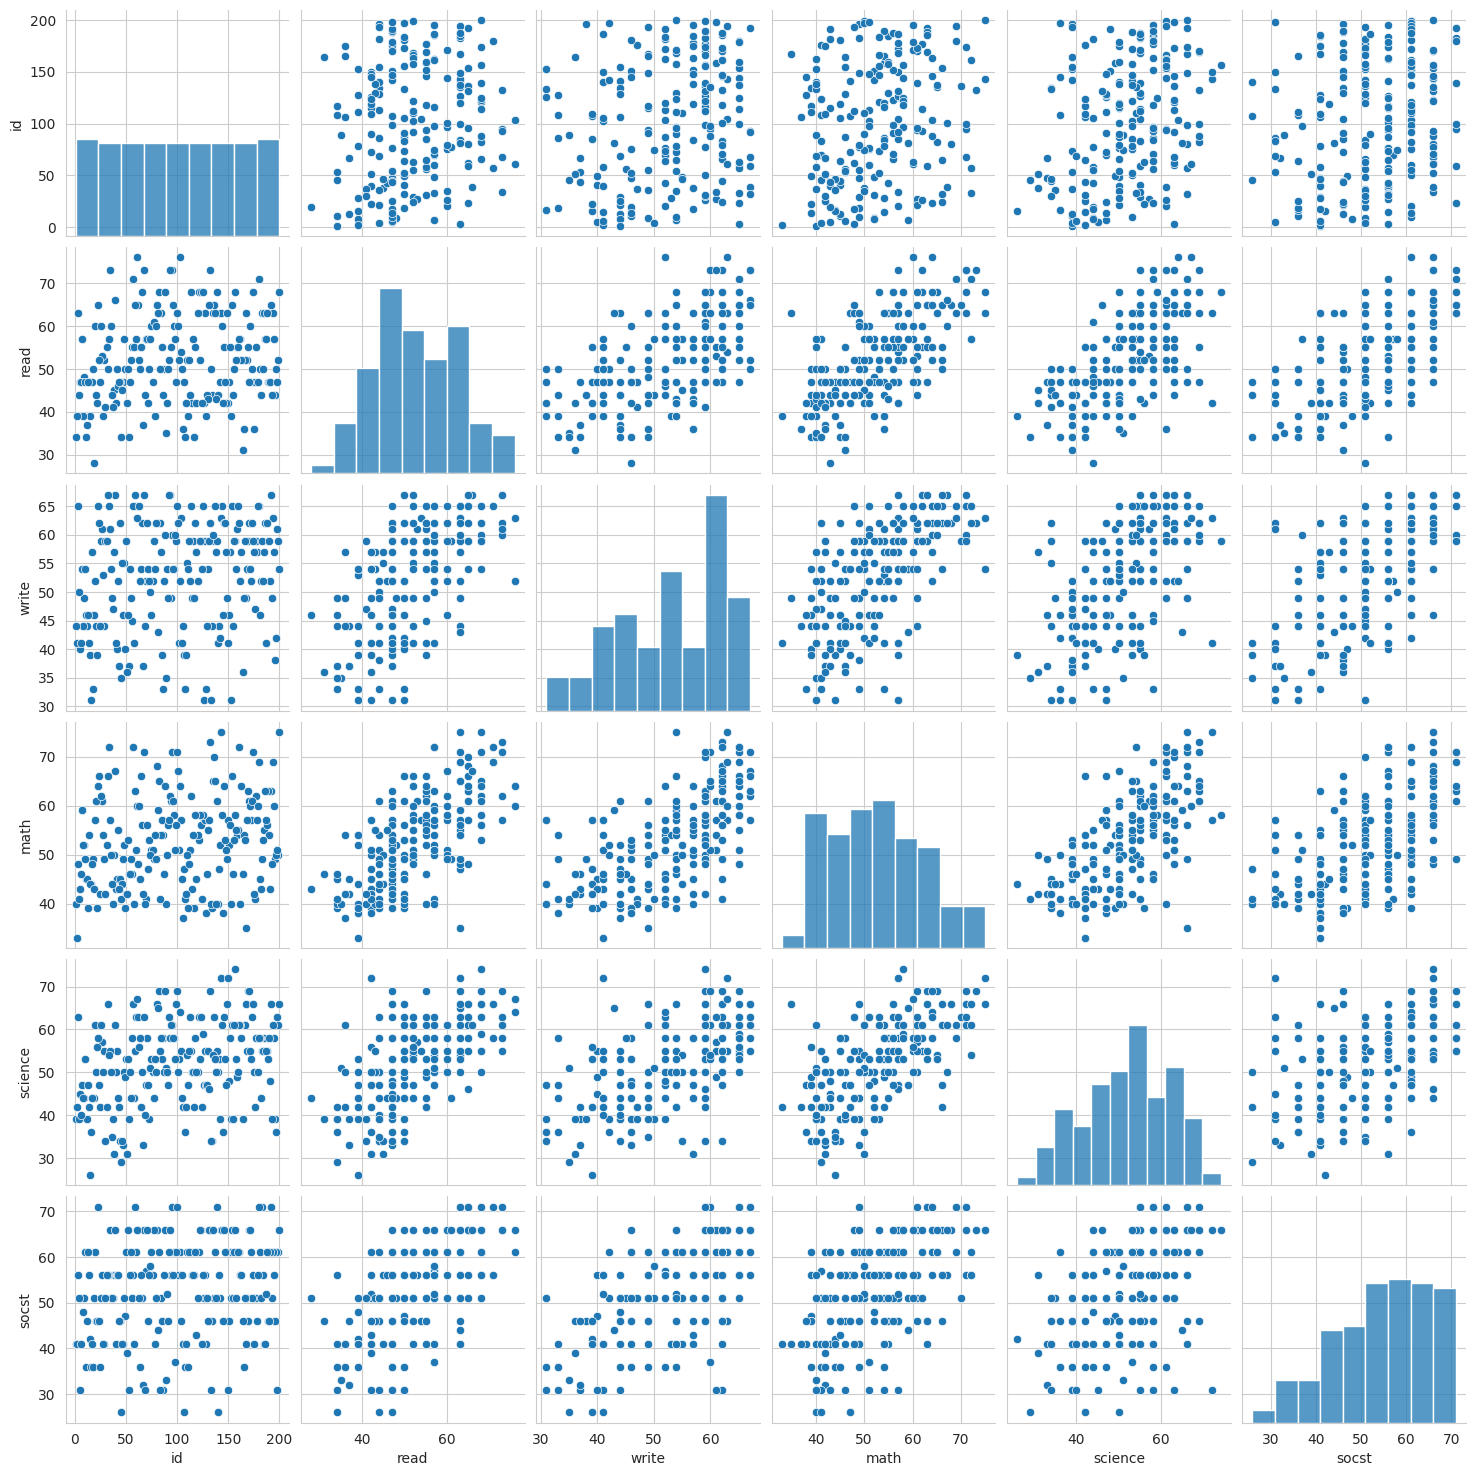

In [35]:
# Data visualization
# Pairplot to visualize the relationships between numerical variables
sns.pairplot(df)
plt.show()

<ipython-input-36-fc72e126b8e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


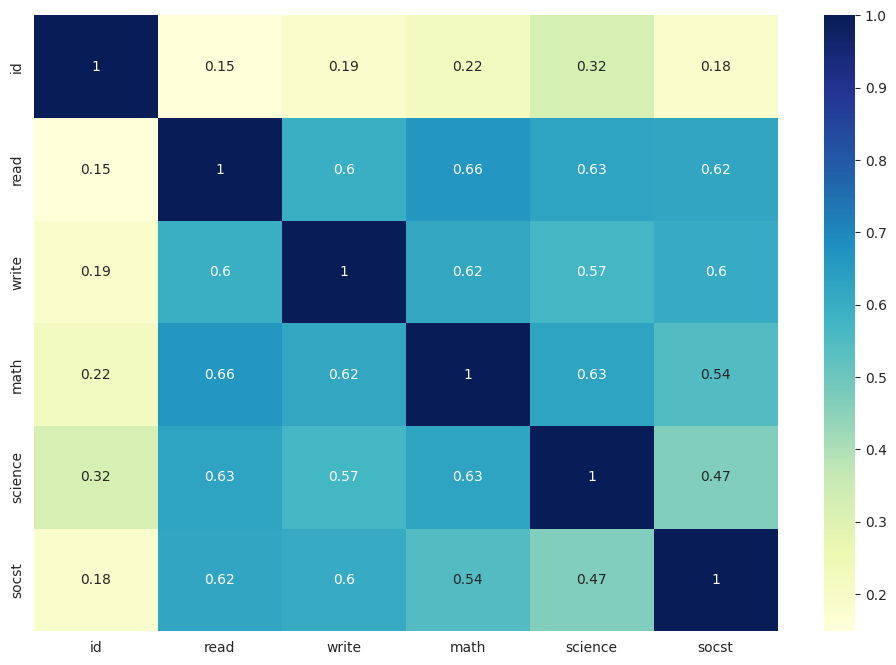

In [36]:
# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

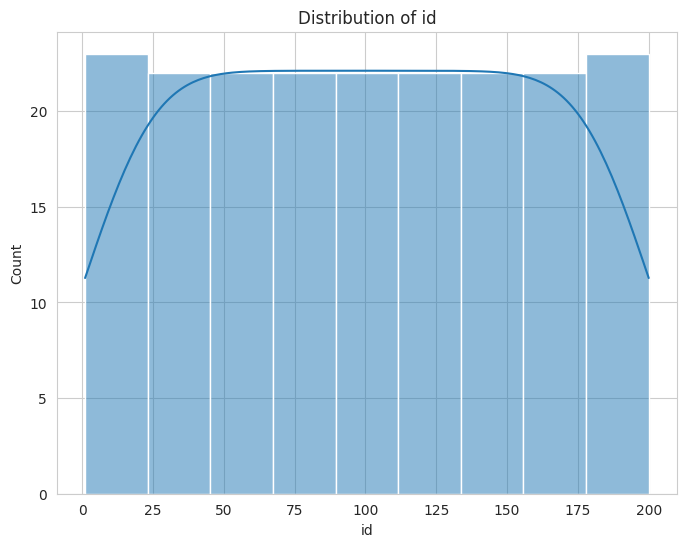

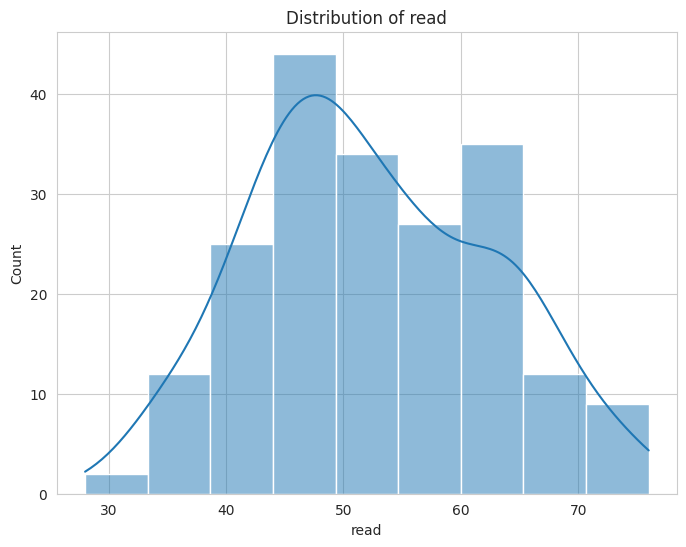

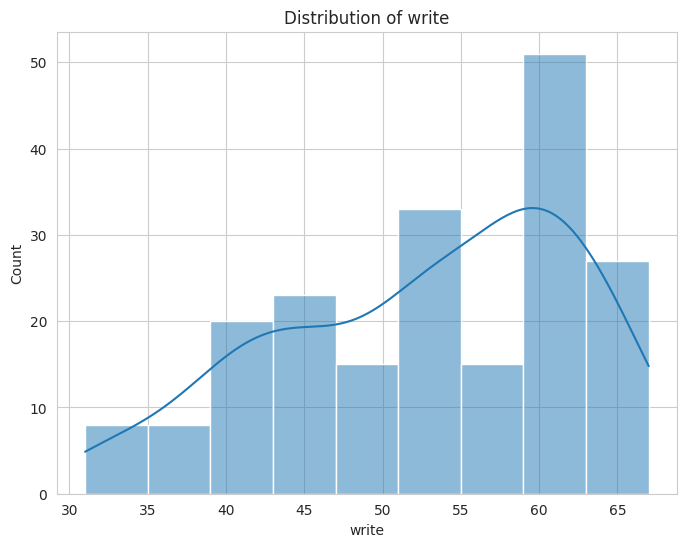

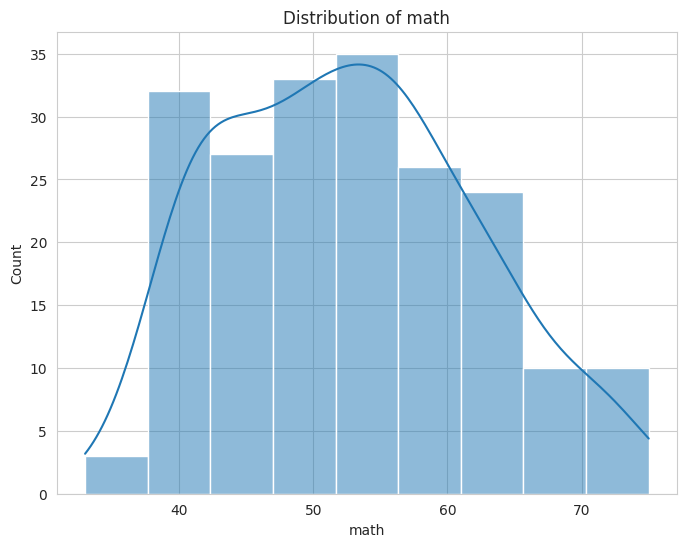

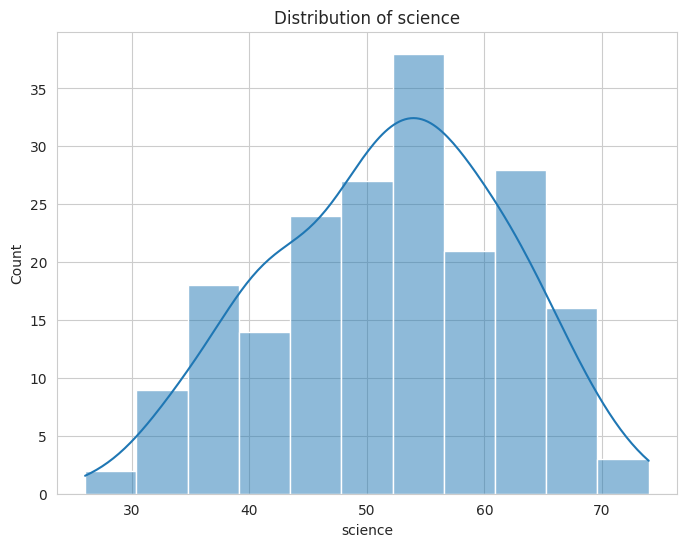

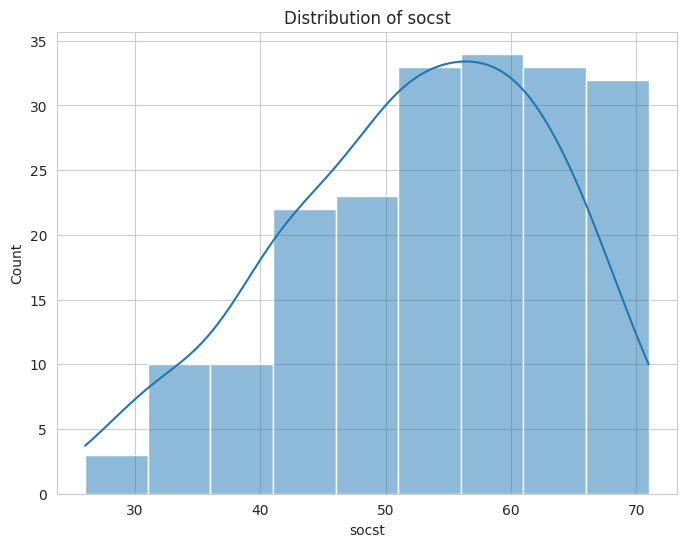

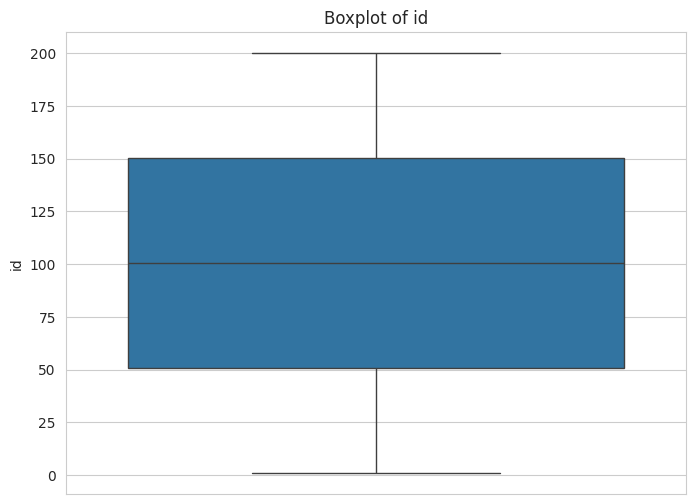

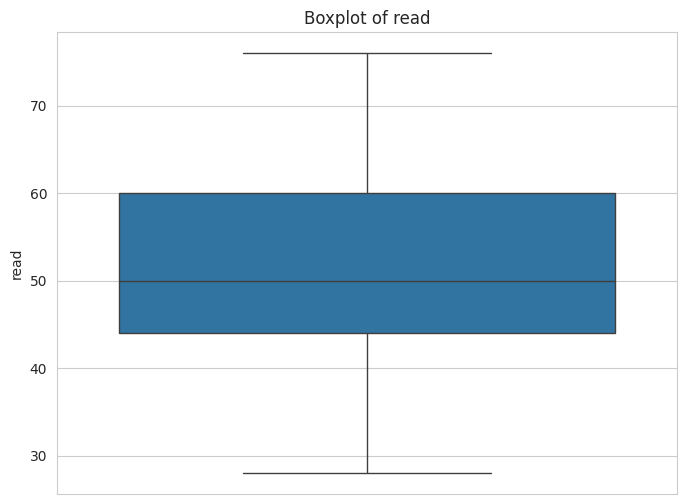

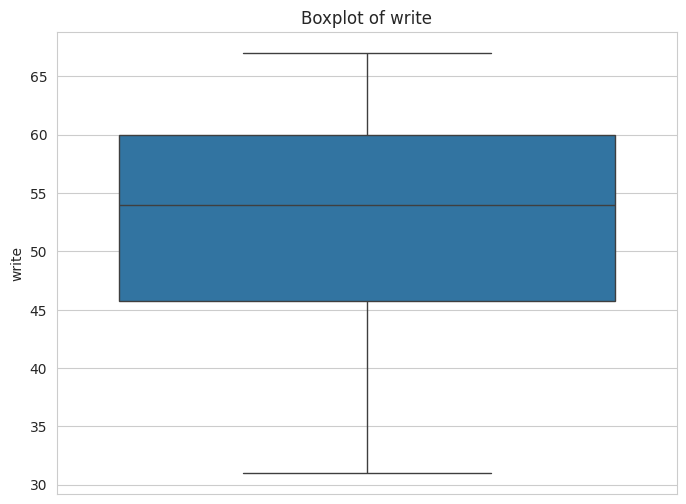

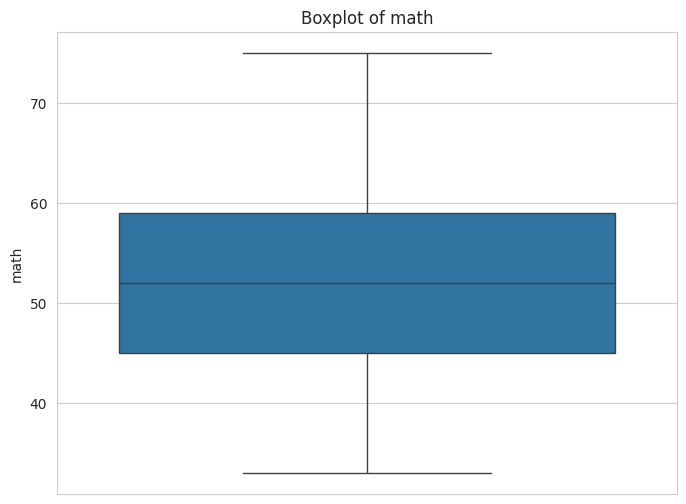

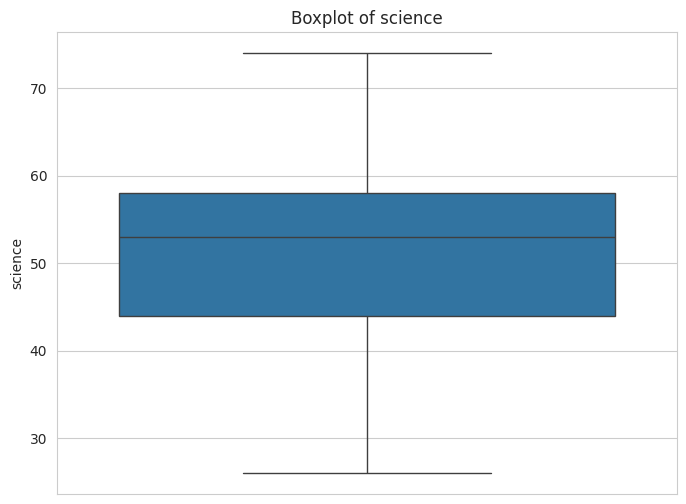

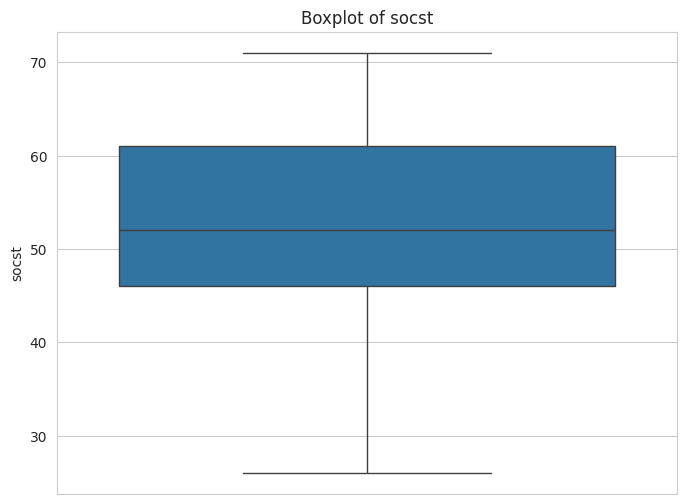

In [37]:
# Distribution of numerical variables
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Boxplot to identify outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

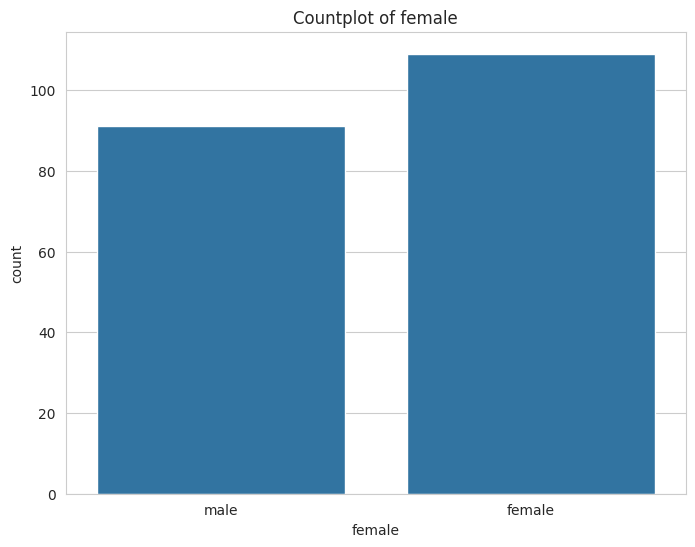

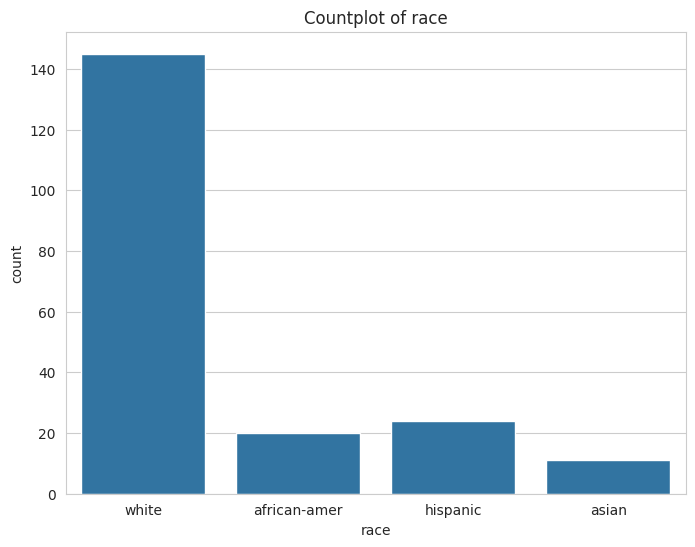

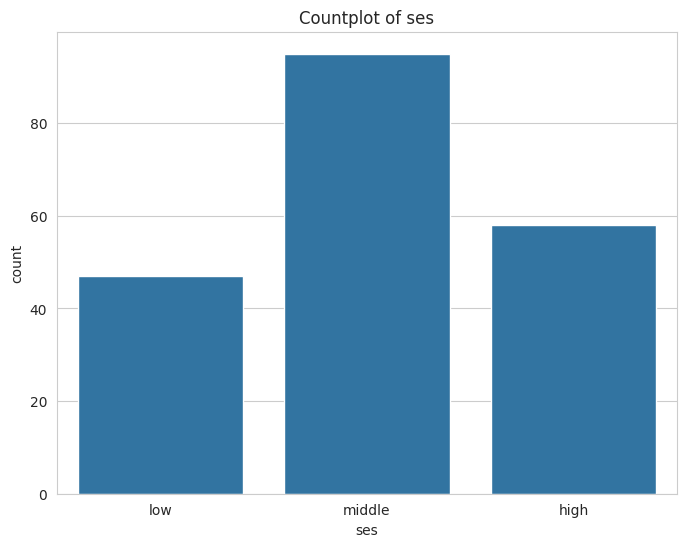

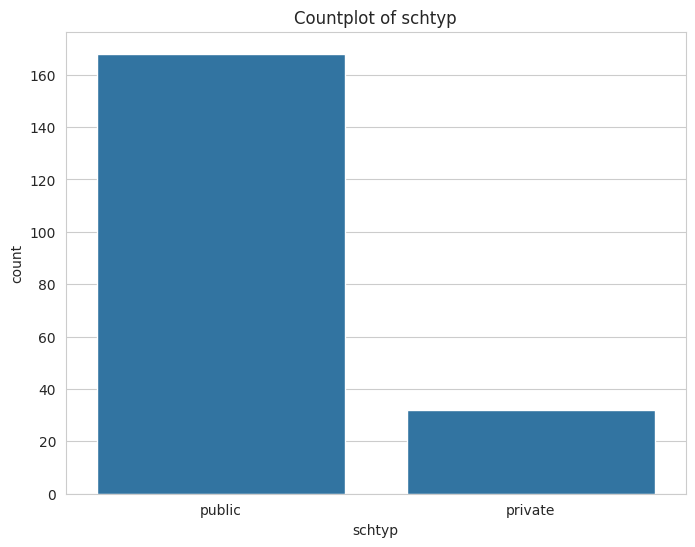

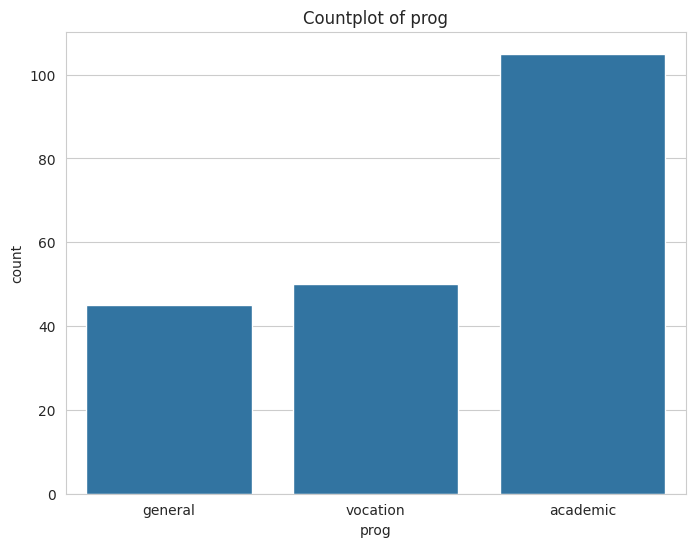

In [38]:
# Countplot for categorical variables
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.show()

In [40]:
# Label encoding for categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Updated dataset after label encoding
print(df.head())

    id  female  race  ses  schtyp  prog  read  write  math  science  socst
0   70       1     3    1       1     1    57     52    41       47     57
1  121       0     3    2       1     2    68     59    53       63     61
2   86       1     3    0       1     1    44     33    54       58     31
3  141       1     3    0       1     2    63     44    47       53     56
4  172       1     3    2       1     0    47     52    57       53     61
